In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import math
from astropy import table
from astropy.table import Table, join, unique
from astropy.io import ascii
import astropy.io.fits as pyfits
from astropy.wcs import WCS
import os


In [2]:
# import SNeCO data
SNe_Gal_File = '../Data/3.SNe+GalData.csv'
SNe_Gal_Data = Table.read(SNe_Gal_File, format='csv') 

SNe_Gal_Data[0]

galaxy,SN_name,SN_type,SN_ra,SN_dec,SN_xCoord,SN_yCoord,SN_co21int,SN_co21err,SN_co21ew,map_beamsize,orient_ra,orient_dec,dist,orient_posang,orient_incl,size_r25,telOrient,ImageFile150,ErrFile150,AlphaCOFile,PACovFile,IFRFile,MixedMaps,IFRResizedMaps,MassMaps
str8,str11,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str9,str112,str113,str80,str112,str97,str37,str54,str35
circinus,SN1996cr,II,213.2918,-65.3457,86.56761411031889,84.63433198287285,186.84804,2.137819,34.56537,0.002032163908078,213.29124,-65.33915,4.2,36.74,64.3,262.49515,7m+tp,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_mom0.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_emom0.fits,/data/kant/0/sun.1608/PHANGS/ALMA/alphaCO/v1p0/ESO097-013_alphaCO21_scaling.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_coverage2d.fits,/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/z0mgs/eso097-013_w1_gauss7p5.fits,../Data/MixedMaps/circinus_Mixed.fits,../Data/ReprojectedInfraredMaps/circinus_reshaped.fits,../Data/MassMaps/circinus_Mass.fits


In [3]:
# File location: /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc7793/ngc7793_7m+tp_co21_150pc_broad_mom0.fits

In [4]:
# isolate unique galaxies, their distances, and their telescope orientation
galData = unique(SNe_Gal_Data,"galaxy")
gals, telOrient = galData["galaxy"], galData["telOrient"]

# for i in range(len(gals)):
#     print(gals[i], telOrient[i])

In [5]:
pc60FileList, pc90FileList, pc60errFile, pc90errFile = [],[],[],[]

def fileStr(galaxy, telOrient, res, mapType="img"):
    if galaxy ==  "ngc0628":
        telOrient = "12m+7m"
    if galaxy == "ngc3627":
        telOrient = "2_12m+7m"
    if galaxy == "ngc5236":
        telOrient = "12m+7m"
    if galaxy =="ngc6744":
        telOrient = "12m+7m+tp"        
        
    if mapType == "img":
        return("/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/" + galaxy + "/" + galaxy + "_" + telOrient + "_co21_" + str(res) + "pc_broad_mom0.fits")
    else:
        return("/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/" + galaxy + "/" + galaxy + "_" + telOrient + "_co21_" + str(res) + "pc_broad_emom0.fits")

for i in range(len(gals)):
    pc60FileList.append(fileStr(gals[i], telOrient[i], 60))
    pc60errFile.append(fileStr(gals[i], telOrient[i], 60, mapType="err"))


In [6]:
# group each galaxy's SNe data

gal_groups = SNe_Gal_Data.group_by('galaxy')
galaxies = gal_groups.groups.keys
indices = gal_groups.groups.indices
indices = indices.tolist()
indices.append(0)
#print(gals)
print(indices)
# print(gal_groups["SN_name"][4])

images60, err60, name, types, ras, decs, dists = [],[],[],[],[],[],[]
for i in range(len(indices)-2):
    SNnames, SNtypes, SNras, SNdecs = [],[],[],[]
    images60.append(pc60FileList[i])
    err60.append(pc60errFile[i])
    if gal_groups["SN_name"][indices[i]] != "SN1989B" and gal_groups["SN_name"][indices[i]] != "SN1973R":
    # Attach first SN per galaxy to a list
        SNnames.append(gal_groups["SN_name"][indices[i]])
        SNtypes.append(gal_groups["SN_type"][indices[i]])
        SNras.append(gal_groups["SN_ra"][indices[i]])
        SNdecs.append(gal_groups["SN_dec"][indices[i]])
    j = 1
    # attach additional  SN to list when galaxy has more than one
    while(indices[i] + j < indices[i+1]):    
        if gal_groups["SN_name"][indices[i]+j] != "SN1989B" and gal_groups["SN_name"][indices[i]+j] != "SN1973R":
            SNnames.append(gal_groups["SN_name"][indices[i]+j])
            SNtypes.append(gal_groups["SN_type"][indices[i]+j])
            SNras.append(gal_groups["SN_ra"][indices[i]+j])
            SNdecs.append(gal_groups["SN_dec"][indices[i]+j])
        j += 1
    name.append(SNnames)
    types.append(SNtypes)
    ras.append(SNras)
    decs.append(SNdecs)
    dists.append(gal_groups["dist"][indices[i]])
print(name)
print(dists)

[0, 1, 2, 3, 4, 5, 7, 10, 11, 12, 16, 18, 19, 20, 21, 23, 24, 28, 32, 39, 45, 46, 47, 49, 50, 52, 53, 55, 60, 61, 62, 63, 0]
[['SN1996cr'], ['SN1940E'], ['SN2013ej'], ['SN2018ivc'], ['SN1995V'], ['SN1999eu', 'SN1992bd'], ['SN2001du', 'SN1983V', 'SN2012fr'], ['SN1985P'], ['SN1935C'], ['SN1984J', 'SN1986L', 'SN2005df', 'SN2009ib'], ['ASASSN-14ha', 'SN2010el'], ['SN1999em'], ['SN2017gax'], ['SN1993Z'], ['SN2008eh', 'SN2003jg'], ['SN2012A'], ['SN2016cok', 'SN2009hd'], ['SN1967H', 'SN1972Q', 'SN1986I', 'SN2014L'], ['SN1961I', 'SN1926A', 'SN1999gn', 'SN2006ov', 'SN2020jfo', 'SN1964F', 'SN2014dt'], ['SN1959E', 'SN2006X', 'SN2020oi', 'SN2019ehk', 'SN1901B', 'SN1979C'], ['SN2012cg'], ['SN2020nvb'], ['SN1988M', 'SN1960F'], ['SN1981B'], ['SN1989M', 'SN1988A'], ['SN2011ja'], ['SN1986G', 'SN2016adj'], ['SN1983N', 'SN1968L', 'SN1923A', 'SN1950B', 'SN1957D'], ['SN2007it'], ['SN2005at'], ['SN2008bk']]
[4.2, 3.7, 9.84, 13.97, 15.85, 13.58, 19.57, 18.63, 15.28, 19.44, 17.69, 11.7, 19.4, 23.15, 14.06, 10

In [7]:
def getPlotStuff(gal, image, error, names, types, ras, decs, dists):
    plots, sigma, wcss, hdus, beamsizes, plotAspect, ppb, corner, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts, samDists = [],[], [],[],[],[],[],[],[],[],[],[],[],[],[]

    for i in range(len(gal)):

        if os.path.isfile(image[i]):
            img = image[i]
            err=error[i]

            co_hdu = pyfits.open(img)
            hdus.append(co_hdu)

            beamMaj = co_hdu[0].header['BMAJ']
            beamMin = co_hdu[0].header['BMIN']
            
            if(beamMaj==beamMin):
                beamsizes.append(beamMaj)
            else:
                beamsizes.append(0.0)

            co_map = co_hdu[0].data
            plots.append(co_map)
            err_hdu = pyfits.open(err)
            err_map = err_hdu[0].data
            sig_map = co_map / err_map
            sigma.append(sig_map)
            w = WCS(co_hdu[0].header, naxis=2)
            wcss.append(w)
            x = co_map.shape[0]
            y = co_map.shape[1]
            naxis    = w._naxis # size of image naxis[0] = x and [1] = y
            grid     = np.indices((naxis[1],naxis[0]))
            aspect = float(y)/float(x)
            cdelt = co_hdu[0].header['CDELT1']
            cdelts.append(cdelt)
            ppb.append(beamMaj/np.abs(cdelt))
            plotAspect.append(aspect)
            corner.append(x/15.0)
            
            SNnames.append(name[i])
            SNtypes.append(types[i])
            SNras.append(ras[i]) 
            SNdecs.append(decs[i])
            SNgals.append(gal[i])
            samDists.append(dists[i])
            
        else:
#             print("No 60 pc file for:",image[i])
            pass

    return(plots, sigma, wcss, hdus, beamsizes, plotAspect, ppb, corner, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts, samDists)

In [8]:
# set up 60pc plots, wcs information, and make sigma maps for contours.

plots60, sigma60, wcss60, hdus60, beamsizes60, plotAspect60, ppb60, corner60, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts, samDists = getPlotStuff(gals, images60, err60, name, types, ras, decs, dists)

print(SNnames)

[['SN2013ej'], ['SN2016cok', 'SN2009hd'], ['SN1983N', 'SN1968L', 'SN1923A', 'SN1950B', 'SN1957D'], ['SN2005at']]


In [9]:
legendLabels = []

for i in range(len(SNnames)):
    legendlabel = []
    if len(SNnames[i]) > 1:
        for k in range(len(SNnames[i])):
            if SNtypes[i][k] == 'unclassified':
                label = SNnames[i][k] + ' '  + SNtypes[i][k]
            else:
                label = SNnames[i][k] + ' Type '  + SNtypes[i][k]
            legendlabel.append(label)
    else:
        if SNtypes[i][0] == 'unclassified':
            legendlabel.append(SNnames[i][0] + ' '  + SNtypes[i][0]) 
        else:        
            legendlabel.append(SNnames[i][0] + ' Type '  + SNtypes[i][0])
    legendLabels.append(legendlabel)
print(legendLabels)

print(beamsizes60)


[['SN2013ej Type II'], ['SN2016cok Type II', 'SN2009hd Type II'], ['SN1983N Type Ib', 'SN1968L Type II', 'SN1923A Type II', 'SN1950B unclassified', 'SN1957D unclassified'], ['SN2005at Type Ic']]
[0.000349364509226111, 0.0002830785685173, 0.000703015699547022, 0.000366107217335989]


<ipython-input-10-1535b40f053e>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  current_cmap.set_bad("black")
<ipython-input-10-1535b40f053e>:19: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)
<ipython-input-10-1535b40f053e>:19: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)


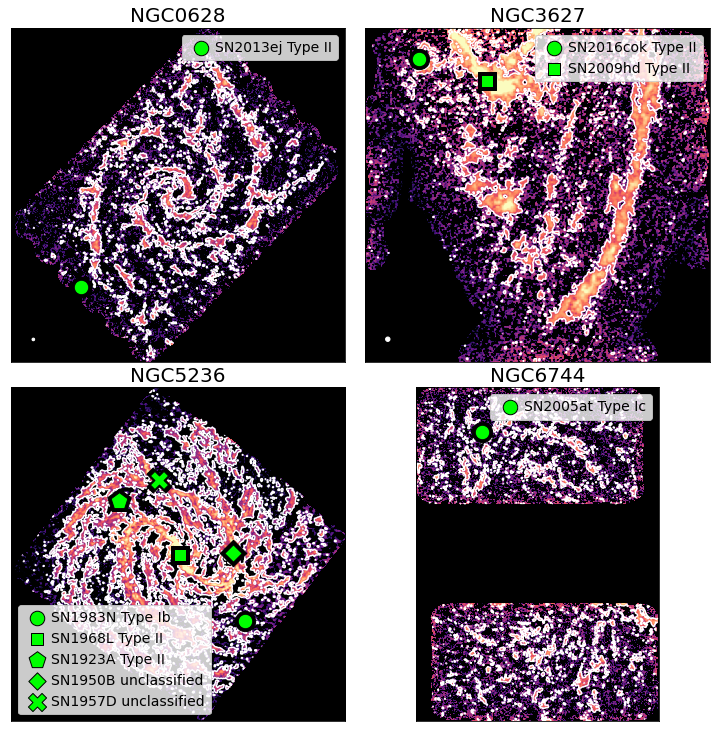

In [10]:
from matplotlib.patches import Circle


markerShapes = ["o", "s", "p", "D", "X", "H", "v"]
markerSizes  = [210,150,310,150,330,310,350]
markerEdges  = [410,350,610,350,630,610,650]

current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")

import math
i,j,m=0,0,0
PLOTS_PER_ROW = 2
fig, axs = plt.subplots(math.ceil(len(plots60)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10, 10))
for plot in plots60:
    draw_circle = plt.Circle((corner60[m], corner60[m]),ppb60[m], fill = True, color = 'white')

    xArr, yArr = wcss60[m].wcs_world2pix(SNras[m],SNdecs[m],0)
    logplot = np.log10(plot)
    axs[i][j].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.0, zorder = 0)
    axs[i][j].set_title(SNgals[m].upper(), fontsize=20)
    axs[i][j].set_xticks([])
    axs[i][j].set_yticks([])
    axs[i][j].add_patch(draw_circle)
    for n in range(len(SNdecs[m])):
        axs[i][j].scatter(xArr[n], yArr[n], color = "black", marker = markerShapes[n], s = markerEdges[n], zorder=2)
        axs[i][j].scatter(xArr[n], yArr[n], color = "lime", marker = markerShapes[n], s = markerSizes[n], edgecolor="black", label = legendLabels[m][n], zorder = 2)
    axs[i][j].contour(sigma60[m], [3], colors = ["white"], linestyles = ("-"), zorder = 1)
    axs[i][j].legend(loc="best", fontsize=14, handletextpad=0.007)

    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    m +=1
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/AllSNeInGalaxies_60pc.png", dpi=300)
   
print()

In [11]:
print(plots60[3][2:10][2:10])
print(plots60[3][2:10])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [12]:
print(SNras)
print(SNgals)
print(SNnames)

[[24.2007], [170.0797, 170.0707], [204.2135, 204.252, 204.2883, 204.2203, 204.2647], [287.4733]]
['ngc0628', 'ngc3627', 'ngc5236', 'ngc6744']
[['SN2013ej'], ['SN2016cok', 'SN2009hd'], ['SN1983N', 'SN1968L', 'SN1923A', 'SN1950B', 'SN1957D'], ['SN2005at']]


332.88275158091994 356.5798802757223
407 257 281 431
228.49829813441235 1000.8518579072179
278 178 950 1050


<ipython-input-13-0e5f2587af8b>:51: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)
<ipython-input-13-0e5f2587af8b>:51: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)
<ipython-input-13-0e5f2587af8b>:22: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)
<ipython-input-13-0e5f2587af8b>:22: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)


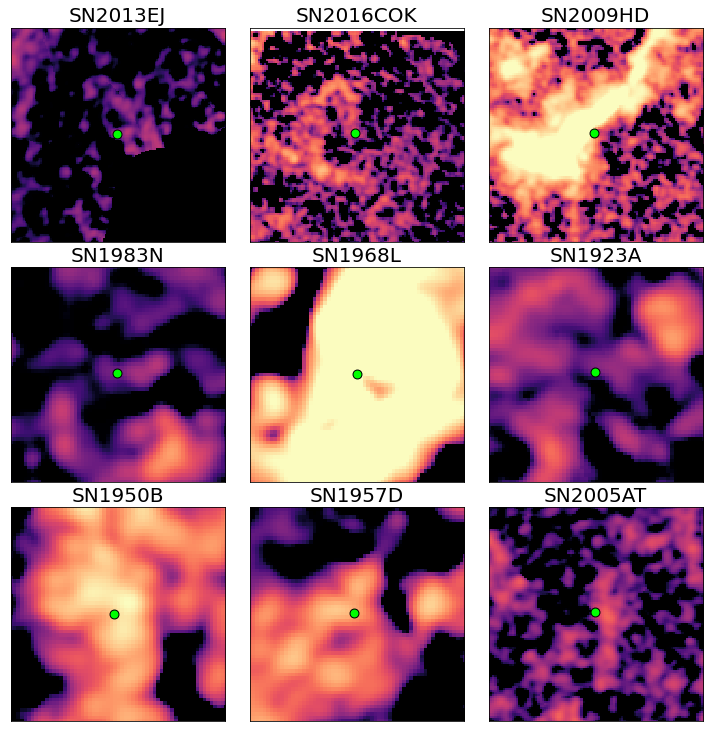

In [13]:

halfBox = 0.00416667 # 15'' in degrees
numSNe = 9
m,n,p =0,0,0 # plot counters for total number, rows, columns
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(numSNe/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10, 10))

#for i in range(0,numSNe): # counter to count total plots
for j in range(len(SNgals)): # counter to count galaxy maps
    if  len(SNras[j]) > 1:
        for k in range(len(SNras[j])): # counter to count number of SN in each galaxy

            SNraStart  = SNras[j][k]  -  halfBox / np.cos(SNdecs[j][k] * np.pi/180)
            SNraEnd    = SNras[j][k]  +  halfBox / np.cos(SNdecs[j][k] * np.pi/180)
            SNdecStart = SNdecs[j][k] -  halfBox
            SNdecEnd   = SNdecs[j][k] +  halfBox

            xVal, yVal     = wcss60[j].wcs_world2pix(SNras[j][k],SNdecs[j][k],0)
            xStart, yStart = wcss60[j].wcs_world2pix(SNraStart, SNdecStart,0)
            xEnd, yEnd     = wcss60[j].wcs_world2pix(SNraEnd, SNdecEnd,0)
            xStart, xEnd, yStart, yEnd = int(xStart), int(xEnd), int(yStart), int(yEnd)
            plot = plots60[j]#[xStart:xEnd][yStart:yEnd]
            logplot = np.log10(plot)

            axs[m][n].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.0, zorder = 0)
            axs[m][n].set_ylim(yStart,yEnd)
            axs[m][n].set_xlim(xStart,xEnd)
            axs[m][n].set_title(SNnames[j][k].upper(), fontsize=20)
            axs[m][n].set_xticks([])
            axs[m][n].set_yticks([])
            axs[m][n].scatter(xVal, yVal, color = "black", marker = "o", s = 60, zorder=2)
            axs[m][n].scatter(xVal, yVal, color = "lime", marker = "o", s = 80, edgecolor="black",zorder = 2)
            
            n+=1
            if n%PLOTS_PER_ROW==0:
                m+=1
                n=0
            p +=1
    else:
        SNraStart  = SNras[j][0]  -  halfBox / np.cos(SNdecs[j][0] * np.pi/180)
        SNraEnd    = SNras[j][0]  +  halfBox / np.cos(SNdecs[j][0] * np.pi/180)
        SNdecStart = SNdecs[j][0] -  halfBox
        SNdecEnd   = SNdecs[j][0] +  halfBox

        xVal, yVal     = wcss60[j].wcs_world2pix(SNras[j][0],SNdecs[j][0],0)
        (print(xVal,yVal))
        xStart, yStart = wcss60[j].wcs_world2pix(SNraStart, SNdecStart,0)
        xEnd, yEnd     = wcss60[j].wcs_world2pix(SNraEnd, SNdecEnd,0)
        xStart, xEnd, yStart, yEnd = int(xStart), int(xEnd), int(yStart), int(yEnd)
        print(xStart, xEnd, yStart, yEnd)
        plot = plots60[j]#[xStart:xEnd][yStart:yEnd]
        logplot = np.log10(plot)

        axs[m][n].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.0, zorder = 0)
        axs[m][n].set_ylim(yStart,yEnd)
        axs[m][n].set_xlim(xStart,xEnd)

        axs[m][n].set_title(SNnames[j][0].upper(), fontsize=20)
        axs[m][n].set_xticks([])
        axs[m][n].set_yticks([])
        axs[m][n].scatter(xVal, yVal, color = "black", marker ="o", s = 60, zorder=2)
        axs[m][n].scatter(xVal, yVal, color = "lime", marker = "o", s = 80, edgecolor="black",zorder = 2)

        n+=1
        if n%PLOTS_PER_ROW==0:
            m+=1
            n=0
        p +=1

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/Zooms_60pc.png", dpi=300)


In [14]:
# Next draw out the spheres of influence
def findAngSize(sphere, dist):
    """ Finds the angular size in decimal degrees when given the 
        size of the sphere in pc and the
        distance to the galaxy in Mpc
    """
    
    angSizeRad = np.arctan(sphere/(dist*10**6))
    angSize = angSizeRad * (180/np.pi)
        
    return(angSize)

sphereSizes = [50,100,200]
angSizes = []

for i in range(len(samDists)):
    
    ang50 = findAngSize(sphereSizes[0], samDists[i])
    ang100 = findAngSize(sphereSizes[1], samDists[i])
    ang200 = findAngSize(sphereSizes[2], samDists[i])
    
    angSizes.append([ang50, ang100, ang200])

# Not used right now but this code finds the pixel sizes of the spheres un case we want to try to make a scale bar    


<ipython-input-44-6109780d0e8d>:17: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-44-6109780d0e8d>:17: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)
<ipython-input-44-6109780d0e8d>:17: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-44-6109780d0e8d>:17: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)
<ipython-input-44-6109780d0e8d>:17: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-44-6109780d0e8d>:17: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)
<ipython-input-44-6109780d0e8d>:17: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-44-6109780d0e8d>:17: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)


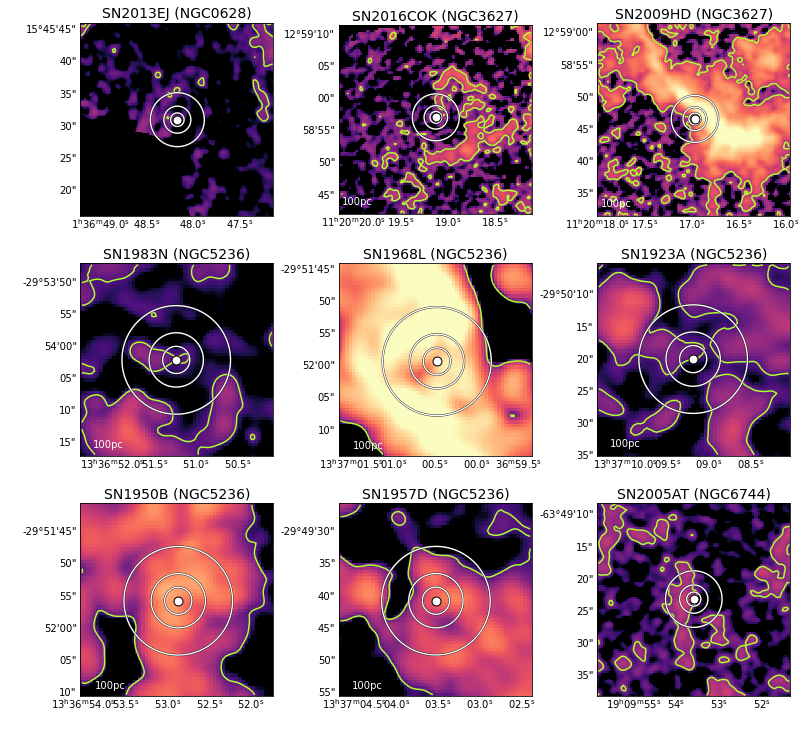

In [44]:
from astropy.coordinates import SkyCoord, Angle
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import astropy.units as u
from astropy.visualization.wcsaxes import SphericalCircle

m,n,p =0,0,0 # plot counters for total number, rows, columns
PLOTS_PER_ROW = 3
#fig, axs = plt.subplots(math.ceil(numSNe/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10, 10))
fig = plt.figure(figsize = (10,10))


for j in range(len(SNgals)): # counter to count galaxy maps

    #set up data to use astropy's cutout2D to plot subsections of galaxy map
    data = plots60[j]
    logData = np.log10(data)    
    sigData = sigma60[j]
    wcs=wcss60[j]
    
    #Account for galaxies that have more than one SN
    if  len(SNras[j]) > 1:
        for k in range(len(SNras[j])): # counter to count number of SN in each galaxy

            #cutout2D needs skycoord position to carry units
            ra, dec = Angle(SNras[j][k] * u.degree), Angle(SNdecs[j][k] * u.degree)
            raRad, decRad  = ra.radian * u.rad, dec.radian * u.rad    
            position = SkyCoord(raRad, decRad) #position is center, use ra & dec of SN location
            size = u.Quantity((30,30), u.arcsec) #size is size of box in arcsec 
            # make 2D cutout, will assign a new wcs to cutout to keep track of coords
            cutout = Cutout2D(logData, position, size, wcs) 
            # use this new wcs when converting to pixels to add additional details to plot
            xval, yval = cutout.wcs.wcs_world2pix(ra,dec, 0)
            # get S-N-R data for contours
            sigCutout = Cutout2D(sigData, position, size, wcs)
            
            titleStr = SNnames[j][k].upper() + " (" + SNgals[j].upper() + ")"
            # make plot
            axs[m][n] = fig.add_subplot(3,3,p+1,projection = cutout.wcs)
            axs[m][n].set_title(titleStr, fontsize=14)            
            axs[m][n].imshow(cutout.data, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.5, zorder = 0)
            axs[m][n].scatter(xval, yval, color = "black", marker ="o", s = 60, zorder=2)
            axs[m][n].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
            axs[m][n].set_ylabel(" ")
            axs[m][n].set_xlabel(" ")
            axs[m][n].tick_params(axis = "both", direction = "in", length = 0)
            axs[m][n].contour(sigCutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), zorder = 1)

            #get spheres of influence
            spheres = angSizes[j]
            c50a = SphericalCircle((ra,dec), spheres[0] * u.degree, ec = "black", fill = False, lw=2.1,transform=axs[m][n].get_transform('world'))
            c50b = SphericalCircle((ra,dec), spheres[0] * u.degree, ec = "white", fill = False,lw=1.4,transform=axs[m][n].get_transform('world'))
            c100a = SphericalCircle((ra,dec), spheres[1] * u.degree, ec = "black", fill = False,lw=2.1,transform=axs[m][n].get_transform('world'))
            c100b = SphericalCircle((ra,dec), spheres[1] * u.degree, ec = "white", fill = False, lw=1.4,transform=axs[m][n].get_transform('world'))
            c200a = SphericalCircle((ra,dec), spheres[2] * u.degree, ec = "black", fill = False, lw=2.1,transform=axs[m][n].get_transform('world'))
            c200b = SphericalCircle((ra,dec), spheres[2] * u.degree, ec = "white", fill = False, lw=1.4,transform=axs[m][n].get_transform('world'))
            c = [c50a, c50b, c100a,c100b,c200a,c200b]
            for q in range(len(c)):
                axs[m][n].add_patch(c[q])
                                
            #get Pixel distance for scalebar
            pixDists=[]
            for i in range(len(spheres)):
                sphereEdgeRa, sphereEdgeDec = ra + Angle(spheres[i]*u.degree), dec + Angle(spheres[i]*u.degree)
                sphereEdgex, sphereEdgey = cutout.wcs.wcs_world2pix(sphereEdgeRa, sphereEdgeDec, 0)
                pixDistx, pixDisty = sphereEdgex-xval, sphereEdgey-yval
                pixDists.append(np.sqrt((pixDistx**2 + pixDisty**2)/2))
                
            lowerleftra  = ra.value + halfBox 
            lowerleftdec = dec.value - halfBox + halfBox*0.1
            val=pixDists[1]
            d_ra = val
            d_dec = 0

            #axs[m][n].arrow(lowerleftra, lowerleftdec, d_ra, d_dec, head_width=0, head_length=0, fc='white', ec='white', width=3, transform=axs[m][n].get_transform('world'))
            axs[m][n].text(lowerleftra, lowerleftdec, '100pc', color='white', transform=axs[m][n].get_transform('world'))
                

                
            #iterate over m rows, n columns, and p is total number of plots
            n+=1
            if n%PLOTS_PER_ROW==0:
                m+=1
                n=0
            p +=1
            
    #These galaxies have only one SN
    else:

        ra, dec = Angle(SNras[j][0] * u.degree), Angle(SNdecs[j][0] * u.degree)
        raRad,  decRad  = ra.radian * u.rad, dec.radian * u.rad    
        position = SkyCoord(raRad, decRad)
        size = u.Quantity((30,30), u.arcsec)
        cutout = Cutout2D(logData, position, size, wcs)
        xval, yval = cutout.wcs.wcs_world2pix(ra,dec, 0)
        sigCutout = Cutout2D(sigData, position, size, wcs)        
        titleStr = SNnames[j][0].upper() + " (" + SNgals[j].upper() + ")"
        axs[m][n] = fig.add_subplot(3,3,p+1,projection = cutout.wcs)
        axs[m][n].set_title(titleStr, fontsize=14)
        axs[m][n].imshow(cutout.data, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.5, zorder = 0)
        axs[m][n].scatter(xval, yval, color = "black", marker ="o", s = 60, zorder=2)
        axs[m][n].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[m][n].set_ylabel(" ")
        axs[m][n].set_xlabel(" ")
        axs[m][n].tick_params(axis = "both", direction = "in", length = 0)
        axs[m][n].contour(sigCutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), zorder = 1)
        spheres = angSizes[j]
        c50a = SphericalCircle((ra,dec), spheres[0] * u.degree, ec = "black", fill = False, lw=2.1,transform=axs[m][n].get_transform('world'))
        c50b = SphericalCircle((ra,dec), spheres[0] * u.degree, ec = "white", fill = False,lw=1.4,transform=axs[m][n].get_transform('world'))
        c100a = SphericalCircle((ra,dec), spheres[1] * u.degree, ec = "black", fill = False,lw=2.1,transform=axs[m][n].get_transform('world'))
        c100b = SphericalCircle((ra,dec), spheres[1] * u.degree, ec = "white", fill = False, lw=1.4,transform=axs[m][n].get_transform('world'))
        c200a = SphericalCircle((ra,dec), spheres[2] * u.degree, ec = "black", fill = False, lw=2.1,transform=axs[m][n].get_transform('world'))
        c200b = SphericalCircle((ra,dec), spheres[2] * u.degree, ec = "white", fill = False, lw=1.4,transform=axs[m][n].get_transform('world'))
        c = [c50a, c50b, c100a,c100b,c200a,c200b]
        for q in range(len(c)):
            axs[m][n].add_artist(c[q])
        n+=1
        if n%PLOTS_PER_ROW==0:
            m+=1
            n=0
        p +=1
#     plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.3, hspace = 0.0)
plt.tight_layout(pad=0.5, w_pad=6.8, h_pad=1.0)
fig.savefig("../Figures/Zooms_60pc.png", dpi=300)
plt.show()


In [45]:
lowerleftra  = ra + 0.004167*u.degrees
lowerleftdec = dec - 0.004167*u.degrees
d_ra = pixDists[1]
d_dec = 0

ax.arrow(lowerleftra, lowerleftdec, d_ra, d_dec, 
         head_width=0, head_length=0, 
         fc='white', ec='white', width=0.003, 
         transform=axs[m][n].get_transform('world'))
plt.text(lowerleftra, lowerleftdec, '100pc', 
         color='white', rotation=90, 
         transform=axs[m][n].get_transform('world'))

AttributeError: module 'astropy.units' has no attribute 'degrees'